In [1]:
import numpy as np
import matplotlib.pyplot as plt
from generate_sobol import RandomState
%matplotlib inline

In [2]:
def plot(qs, pqs, ps, title=''):
    fig, axs = plt.subplots(nrows=3,
                            sharex=True, 
                            # subplot_kw={'aspect': 1}, 
                            figsize=(15, 2))
    axs[0].plot(qs, np.zeros_like(qs), '*')
    axs[1].plot(pqs, np.zeros_like(pqs), '*')
    axs[2].plot(ps, np.zeros_like(ps), '*')
    axs[0].set_title(title)

In [3]:
def get_series(n_samples):
    # quasi random series
    rng = RandomState(1, randomize=False, nmax=20000)
    q_seq = rng.rand(n_samples)

    # pseudo quasi random series
    rng = RandomState(1, randomize=True, nmax=20000)
    pq_seq = rng.rand(n_samples)

    # pseudo random series
    p_seq = np.random.rand(n_samples)
    
    return q_seq, pq_seq, p_seq

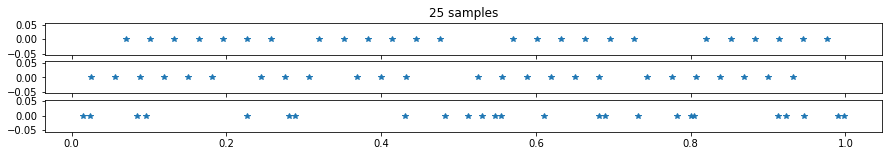

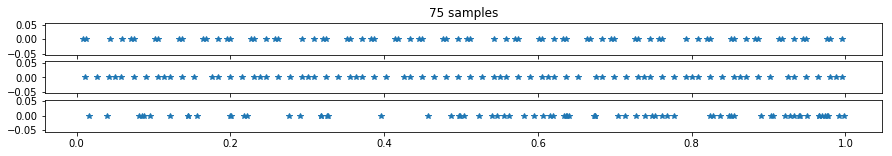

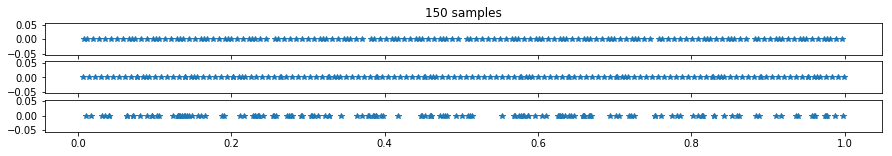

In [4]:
plot(*get_series(25), '25 samples')
plot(*get_series(75), '75 samples')
plot(*get_series(150), '150 samples')